In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

In [28]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [30]:
df['Subscription_Start_Date']= pd.to_datetime(df['Subscription_Start_Date'])
df['Date_of_Churn']= pd.to_datetime(df['Date_of_Churn'])

In [31]:
df['month_year_churn'] = df['Date_of_Churn'].dt.strftime("%Y-%m")
df

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,month_year_churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaT,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaT,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaT,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaT,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,Other,East,2020-10-26 01:53:37.667884,Basic,9.99,PayPal,0.700179,Documentary,Mobile,3.310731,1035,1,1,2021-03-14 01:53:37.667884,Found better service,2021-03
996,997,66,Female,West,2020-05-06 01:53:37.667895,Standard,14.99,Credit Card,20.153308,Action,Mobile,3.222521,1069,4,0,NaT,NaN,NaN
997,998,52,Other,South,2019-06-19 01:53:37.667906,Standard,14.99,PayPal,39.170314,Drama,PC,1.221380,1079,1,0,NaT,NaN,NaN
998,999,69,Male,East,2020-11-13 01:53:37.667917,Standard,14.99,Credit Card,8.455372,Sci-Fi,Mobile,1.865411,1092,2,1,2021-04-05 01:53:37.667917,Found better service,2021-04


In [32]:
df['Subscription_Length'] = pd.to_datetime(df['Date_of_Churn']) - pd.to_datetime(df['Subscription_Start_Date'])
df

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,month_year_churn,Subscription_Length
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaT,NaN,NaN,NaT
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaT,NaN,NaN,NaT
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaT,NaN,NaN,NaT
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaT,NaN,NaN,NaT
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaT,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,Other,East,2020-10-26 01:53:37.667884,Basic,9.99,PayPal,0.700179,Documentary,Mobile,3.310731,1035,1,1,2021-03-14 01:53:37.667884,Found better service,2021-03,139 days
996,997,66,Female,West,2020-05-06 01:53:37.667895,Standard,14.99,Credit Card,20.153308,Action,Mobile,3.222521,1069,4,0,NaT,NaN,NaN,NaT
997,998,52,Other,South,2019-06-19 01:53:37.667906,Standard,14.99,PayPal,39.170314,Drama,PC,1.221380,1079,1,0,NaT,NaN,NaN,NaT
998,999,69,Male,East,2020-11-13 01:53:37.667917,Standard,14.99,Credit Card,8.455372,Sci-Fi,Mobile,1.865411,1092,2,1,2021-04-05 01:53:37.667917,Found better service,2021-04,143 days


In [61]:
# Churners based on Reason for Churn
df.groupby(['Reason_for_Churn'])['Churned'].sum()

Reason_for_Churn
Dissatisfied with content    52
Found better service         64
Personal reasons             62
Price increase               68
Name: Churned, dtype: int64

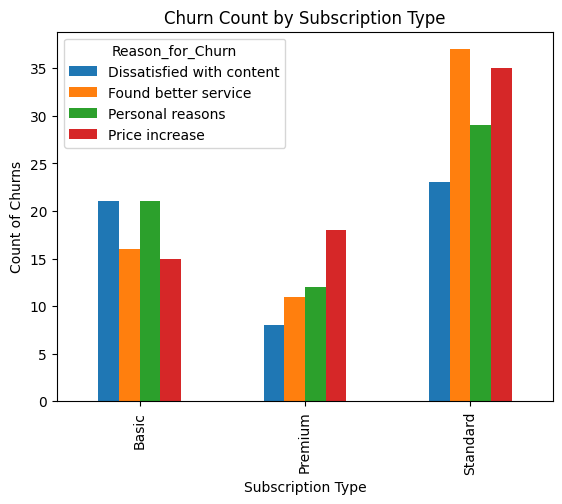

In [33]:
# Churners based on Subscription Type and Churn Reasons
churned_df = (df[df['Churned'] == 1])
churn_counts = churned_df.groupby(['Subscription_Type', 'Reason_for_Churn']).size().unstack(fill_value=0)

churn_counts.plot(kind='bar')
plt.title('Churn Count by Subscription Type')   
plt.xlabel('Subscription Type')
plt.ylabel('Count of Churns')
plt.show()

In [34]:
# Average Non-Churners Monthly Watch Time
df[(df['Churned']==0)]['Monthly_Hours_Watched'].mean()

19.734607278346715

In [35]:
# Average Churner Monthly Watch Time
df[(df['Churned']==1)]['Monthly_Hours_Watched'].mean()

17.03967201860143

In [36]:
df.groupby(['Subscription_Type','Reason_for_Churn'])['Monthly_Hours_Watched'].mean()

Subscription_Type  Reason_for_Churn         
Basic              Dissatisfied with content    10.667641
                   Found better service         21.009132
                   Personal reasons             17.997138
                   Price increase               23.007866
Premium            Dissatisfied with content    10.657816
                   Found better service         14.680395
                   Personal reasons             12.866614
                   Price increase               16.623839
Standard           Dissatisfied with content    17.824207
                   Found better service         20.370466
                   Personal reasons             16.503175
                   Price increase               16.168669
Name: Monthly_Hours_Watched, dtype: float64

In [37]:
# Average Session Length by Subscription Type (incl. Churners)
df.groupby(['Subscription_Type'])['Average_Session_Length'].mean()

Subscription_Type
Basic       1.886085
Premium     1.955262
Standard    1.875266
Name: Average_Session_Length, dtype: float64

In [38]:
# Average Session Length by Subscription Type for Churners Only (sorted by Reason for Churn)
df.groupby(['Subscription_Type','Reason_for_Churn'])['Average_Session_Length'].mean()

Subscription_Type  Reason_for_Churn         
Basic              Dissatisfied with content    1.617134
                   Found better service         1.655985
                   Personal reasons             2.385831
                   Price increase               1.746256
Premium            Dissatisfied with content    2.577985
                   Found better service         1.697640
                   Personal reasons             0.992110
                   Price increase               2.799122
Standard           Dissatisfied with content    1.818335
                   Found better service         2.332623
                   Personal reasons             1.514326
                   Price increase               1.770416
Name: Average_Session_Length, dtype: float64

In [41]:
# Churners by Location and Subscription Type
df.groupby(['Subscription_Type','Location'])['Churned'].sum()

Subscription_Type  Location
Basic              Central     13
                   East        15
                   North       15
                   South       15
                   West        15
Premium            Central     11
                   East        10
                   North       12
                   South        8
                   West         8
Standard           Central     23
                   East        35
                   North       26
                   South       19
                   West        21
Name: Churned, dtype: int64

In [69]:
# Churners favourite genre
df.groupby(['Subscription_Type','Favorite_Genre'])['Churned'].sum()

Subscription_Type  Favorite_Genre
Basic              Action            13
                   Comedy            10
                   Documentary       13
                   Drama             13
                   Sci-Fi            24
Premium            Action            12
                   Comedy             9
                   Documentary       11
                   Drama             11
                   Sci-Fi             6
Standard           Action            24
                   Comedy            30
                   Documentary       28
                   Drama             23
                   Sci-Fi            19
Name: Churned, dtype: int64

In [78]:
# Favorite genre by Subscription Type
df.groupby(['Subscription_Type', 'Favorite_Genre'])['Favorite_Genre'].count()


Subscription_Type  Favorite_Genre
Basic              Action             50
                   Comedy             44
                   Documentary        54
                   Drama              67
                   Sci-Fi             61
Premium            Action             44
                   Comedy             37
                   Documentary        33
                   Drama              41
                   Sci-Fi             39
Standard           Action            111
                   Comedy            122
                   Documentary       101
                   Drama             104
                   Sci-Fi             92
Name: Favorite_Genre, dtype: int64

In [58]:
# Average Subscription Length of Churners by Subscription Type
df[df['Churned']==1].groupby(['Subscription_Type'])['Subscription_Length'].mean()

Subscription_Type
Basic      193 days 10:31:13.972602740
Premium    192 days 05:52:39.183673470
Standard   197 days 17:13:32.903225806
Name: Subscription_Length, dtype: timedelta64[ns]

In [43]:
# Segmenting Data by Age Group into 4 Buckets: Gen Z, Millennial, Gen X, and Baby Boomer
bins = [18, 28, 47, 61, float('inf')]
labels = ['Gen Z', 'Millennial', 'Gen X', 'Baby Boomer']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
df

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,month_year_churn,Subscription_Length,Age_Group
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaT,NaN,NaN,NaT,Gen X
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaT,NaN,NaN,NaT,Baby Boomer
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaT,NaN,NaN,NaT,Millennial
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaT,NaN,NaN,NaT,Millennial
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaT,NaN,NaN,NaT,Gen X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,Other,East,2020-10-26 01:53:37.667884,Basic,9.99,PayPal,0.700179,Documentary,Mobile,3.310731,1035,1,1,2021-03-14 01:53:37.667884,Found better service,2021-03,139 days,Gen Z
996,997,66,Female,West,2020-05-06 01:53:37.667895,Standard,14.99,Credit Card,20.153308,Action,Mobile,3.222521,1069,4,0,NaT,NaN,NaN,NaT,Baby Boomer
997,998,52,Other,South,2019-06-19 01:53:37.667906,Standard,14.99,PayPal,39.170314,Drama,PC,1.221380,1079,1,0,NaT,NaN,NaN,NaT,Gen X
998,999,69,Male,East,2020-11-13 01:53:37.667917,Standard,14.99,Credit Card,8.455372,Sci-Fi,Mobile,1.865411,1092,2,1,2021-04-05 01:53:37.667917,Found better service,2021-04,143 days,Baby Boomer


In [48]:
# Amount of Churners based on Age Group and Subscription Type
df.groupby(['Age_Group'])['Churned'].sum().sort_index()

/var/folders/9f/nqg4_8yj1gvfb5sdf02txd9w0000gn/T/ipykernel_2444/1866289439.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Age_Group'])['Churned'].sum().sort_index()


Age_Group
Gen Z          46
Millennial     96
Gen X          53
Baby Boomer    44
Name: Churned, dtype: int64

In [56]:
# Average Subscription Length based on Age Group
df[df['Churned']==1].groupby(['Age_Group','Subscription_Type'])['Subscription_Length'].mean()

/var/folders/9f/nqg4_8yj1gvfb5sdf02txd9w0000gn/T/ipykernel_2444/1538634145.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['Churned']==1].groupby(['Age_Group','Subscription_Type'])['Subscription_Length'].mean()


Age_Group    Subscription_Type
Gen Z        Basic               220 days 15:25:42.857142856
             Premium                       169 days 09:00:00
             Standard                      184 days 13:00:00
Millennial   Basic               199 days 08:28:14.117647058
             Premium             191 days 02:10:54.545454546
             Standard                      203 days 19:48:00
Gen X        Basic                         203 days 20:00:00
             Premium                       168 days 08:00:00
             Standard                      215 days 18:00:00
Baby Boomer  Basic               142 days 17:27:16.363636364
             Premium                       234 days 14:24:00
             Standard            184 days 04:10:26.086956522
Name: Subscription_Length, dtype: timedelta64[ns]

In [59]:
# Reason for Churn categorized by Age Group
df.groupby(['Age_Group','Reason_for_Churn'])['Churned'].sum()

/var/folders/9f/nqg4_8yj1gvfb5sdf02txd9w0000gn/T/ipykernel_2444/4261806545.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Age_Group','Reason_for_Churn'])['Churned'].sum()


Age_Group    Reason_for_Churn         
Gen Z        Dissatisfied with content     8
             Found better service         10
             Personal reasons             16
             Price increase               12
Millennial   Dissatisfied with content    19
             Found better service         28
             Personal reasons             22
             Price increase               27
Gen X        Dissatisfied with content    15
             Found better service         15
             Personal reasons             10
             Price increase               13
Baby Boomer  Dissatisfied with content     7
             Found better service         11
             Personal reasons             10
             Price increase               16
Name: Churned, dtype: int64

In [45]:
# Churners by Devices Used and Subscription Type
df.groupby(['Subscription_Type','Devices_Used'])['Churned'].sum().sort_index()

Subscription_Type  Devices_Used
Basic              Mobile          35
                   PC               9
                   TV              15
                   Tablet          14
Premium            Mobile          24
                   PC               6
                   TV               9
                   Tablet          10
Standard           Mobile          72
                   PC              12
                   TV              20
                   Tablet          20
Name: Churned, dtype: int64

In [68]:
# Mobile Churners sorted by Churn Reason
df[(df['Devices_Used'] == 'Mobile')].groupby(['Reason_for_Churn'])['Churned'].sum()

Reason_for_Churn
Dissatisfied with content    31
Found better service         35
Personal reasons             33
Price increase               32
Name: Churned, dtype: int64

In [67]:
# Mobile Churners sorted by Churn Reason and Subscription Type
df[(df['Devices_Used'] == 'Mobile')].groupby(['Subscription_Type','Reason_for_Churn'])['Churned'].sum()

Subscription_Type  Reason_for_Churn         
Basic              Dissatisfied with content     9
                   Found better service          8
                   Personal reasons             12
                   Price increase                6
Premium            Dissatisfied with content     5
                   Found better service          5
                   Personal reasons              7
                   Price increase                7
Standard           Dissatisfied with content    17
                   Found better service         22
                   Personal reasons             14
                   Price increase               19
Name: Churned, dtype: int64

In [47]:
# Churners that use mobile and left because they found better service
df[(df['Devices_Used'] == 'Mobile') & (df['Reason_for_Churn'] == 'Found better service')].groupby('Subscription_Type')['Churned'].sum()

Subscription_Type
Basic        8
Premium      5
Standard    22
Name: Churned, dtype: int64